Projet Capstone de Data Science

Objectif :Utiliser mes compétences en pandas et en data viz pour déterminer si les notes de Fandango en 2015 étaient orientées vers une meilleure évaluation/notation des films dans le but de vendre plus de billets.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# lecture du fichier fandango_scrape.csv dans le dataframe fandango
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/fandango_scrape.csv'
fandango = pd.read_csv(url)


Exploration des scores affichés par Fandango par rapport aux évaluations des utilisateurs réels

In [5]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [ ]:
fandango.info()

In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Explorons la relation entre la popularité d'un film et son classement. Créez un nuage de points montrant la relation entre les notes et les votes

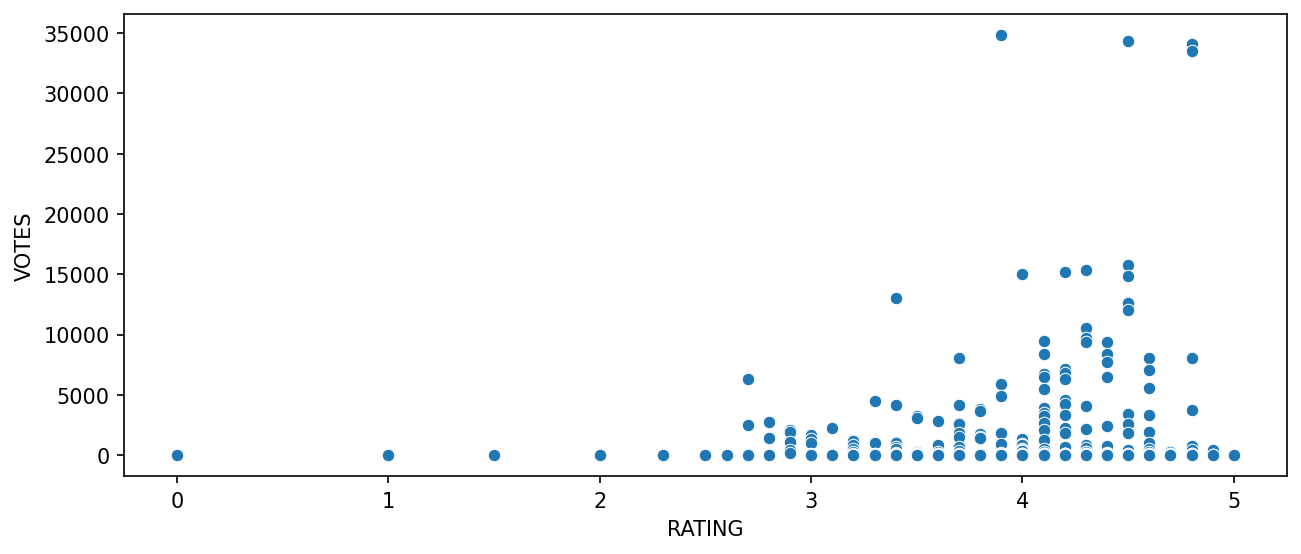

In [7]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,x="RATING",y="VOTES")
plt.show()

Calcul de la corrélation entre les colonnes/features

In [8]:
fandango[["STARS","RATING","VOTES"]].corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Création d'une nouvelle colonne contenant l'année de chaque film et définissez cette nouvelle colonne avec le nom YEAR

In [10]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

Nombre de films par année dans le DataFrame Fandango

In [11]:
fandango['YEAR'].value_counts()

,count
YEAR,
2015),478
2014),23
2016),1
1964),1
2012),1


Visualisation du nombre de films par an avec un graphique

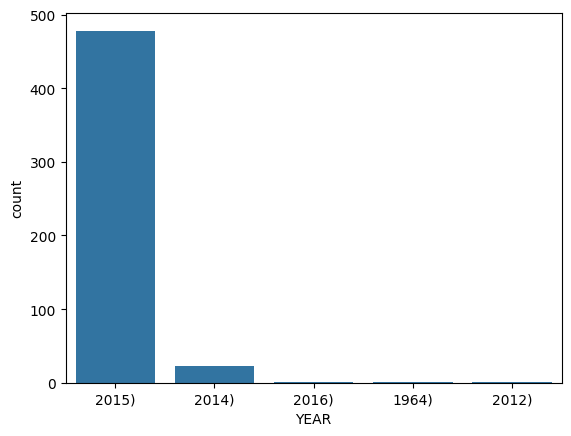

In [12]:
sns.countplot(data=fandango,x='YEAR')
plt.show()


Liste des films ayant obtenu le plus grand nombre de votes

In [13]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


Nombre de films ayant aucun avis/vote

In [14]:
vote=fandango["VOTES"]==0
vote.sum()

69

 DataFrame avec uniquement des films évalués (en supprimant tous les films qui n'ont aucun vote).

In [15]:
new_fandango = fandango[fandango['VOTES']>0]
new_fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015)
431,The Intern (2015),5.0,5.0,1,2015)
432,The Park Bench (2015),5.0,5.0,1,2015)
433,The Wanted 18 (2015),5.0,5.0,1,2015)


Affichage de la distribution des notes affichées (STARS) par rapport à l'évaluation réelle des votes (RATING)

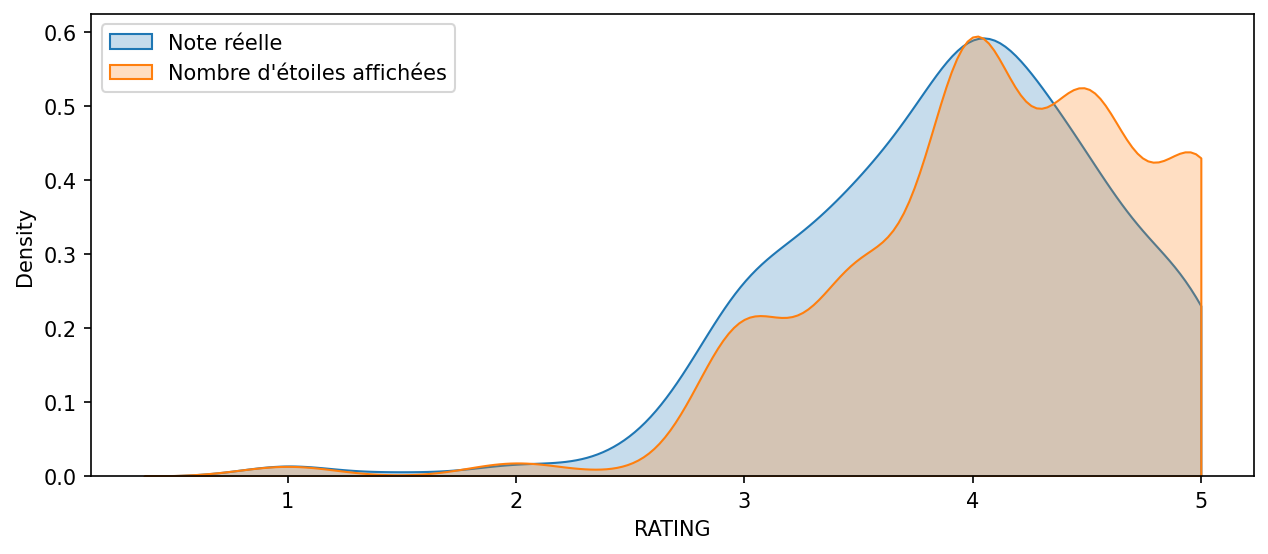

In [16]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=new_fandango,x='RATING',clip=[0,5],fill=True,label="Note réelle")
sns.kdeplot(data=new_fandango,x='STARS',clip=[0,5],fill=True,label="Nombre d'étoiles affichées")
plt.legend();

Créons une nouvelle colonne de la différence entre les étoiles affichées (STARS) et les notes réelles (RATING)

In [17]:
new_fandango["STARS_DIFF"] = new_fandango['STARS'] - new_fandango['RATING']
new_fandango['STARS_DIFF'] = new_fandango['STARS_DIFF'].round(2)


<ipython-input-17-4f658d667e5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_fandango["STARS_DIFF"] = new_fandango['STARS'] - new_fandango['RATING']
<ipython-input-17-4f658d667e5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_fandango['STARS_DIFF'] = new_fandango['STARS_DIFF'].round(2)


In [18]:
new_fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


Diagramme de comptage pour afficher le nombre de fois qu'une certaine différence se produit.

<ipython-input-19-8d9cf137506a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_fandango,x='STARS_DIFF',palette='magma')


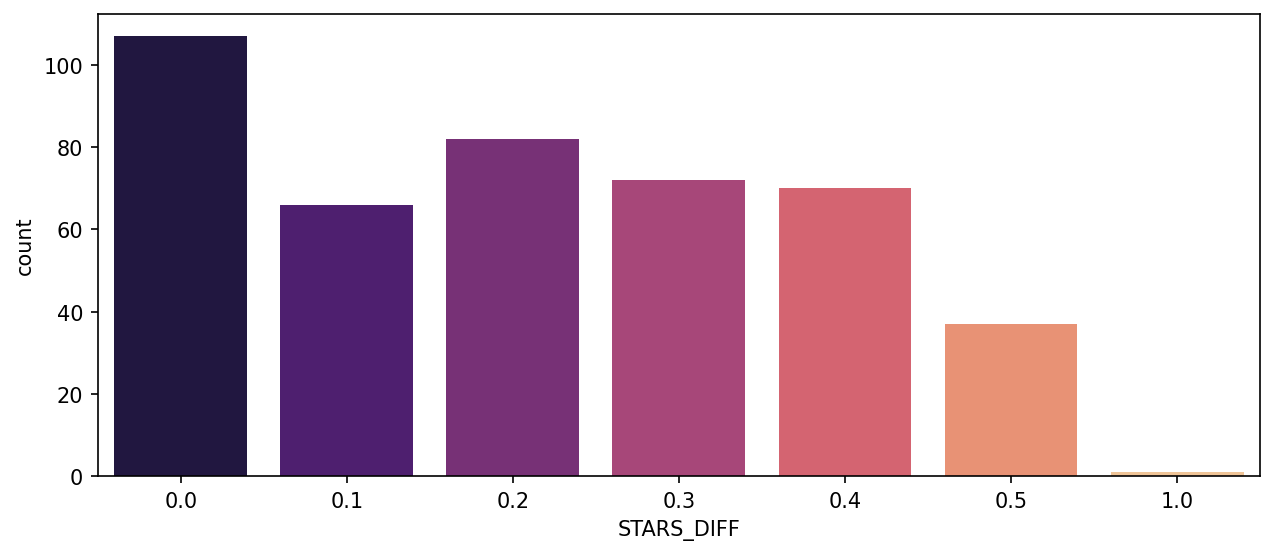

In [19]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=new_fandango,x='STARS_DIFF',palette='magma')
plt.show()

Nous pouvons voir sur le diagramme précédent qu'un film affichait une différence d'une étoile par rapport à sa véritable note

In [20]:
new_fandango[new_fandango['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


Partie 3 : Comparaison des évaluations de Fandango avec d'autres plateformes

Comparons maintenant les scores de Fandango à d'autres sites d'évaluation de films et voyons comment ils se comparent.

In [22]:
# lecture du fichier all_sites_scores.csv dans le dataframe fandango
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/all_sites_scores.csv'
all_sites = pd.read_csv(url)

In [23]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [24]:
all_sites.dtypes

,0
FILM,object
RottenTomatoes,int64
RottenTomatoes_User,int64
Metacritic,int64
Metacritic_User,float64
IMDB,float64
Metacritic_user_vote_count,int64
IMDB_user_vote_count,int64


In [25]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [26]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


Création d'un nuage de points explorant la relation entre les avis des critiques RT et les avis des utilisateurs RT

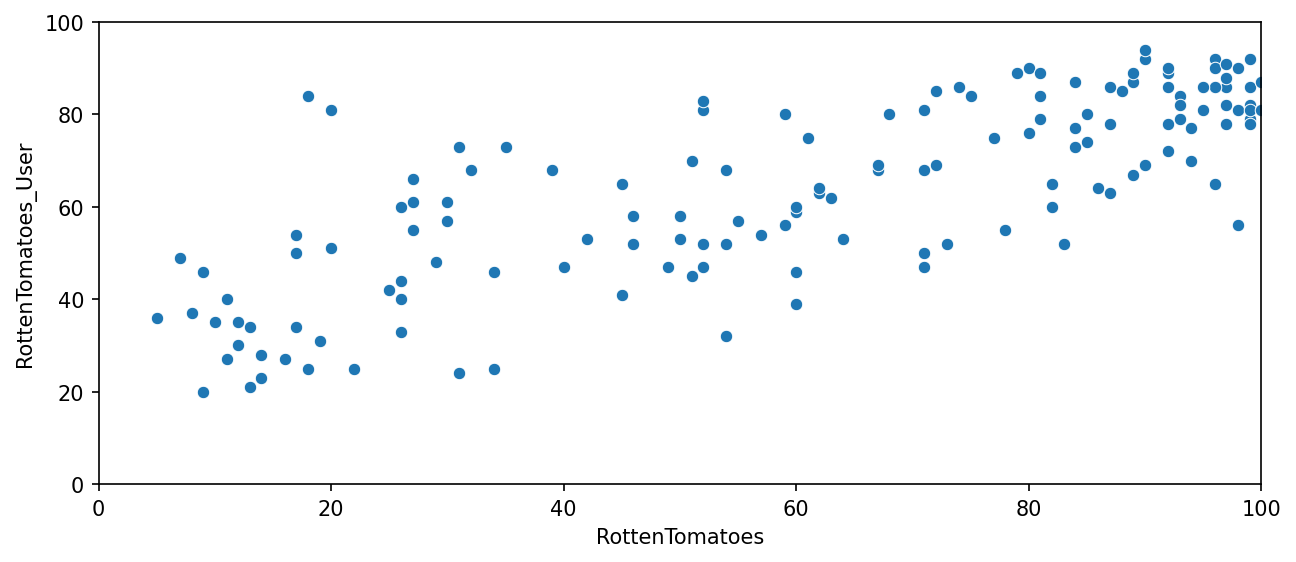

In [27]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100);

Quantifions cette différence en comparant les notes des critiques et celles des utilisateurs RT. Nous allons calculer cela avec RottenTomatoes-RottenTomatoes_User.

Remarque : Rotten_Diff est ici RottenTomatoes (notes des critiques de RT) - RottenTomatoes_User (notes des utilisateurs de RT). Les valeurs proches de 0 signifient donc un accord entre les critiques et les utilisateurs. Des valeurs positives plus élevées signifient que les critiques ont obtenu une note beaucoup plus élevée que les utilisateurs. Des valeurs négatives plus élevées signifient que les utilisateurs ont obtenu une note beaucoup plus élevée que les critiques

nouvelle colonne basée sur la différence entre les notes des critiques et les notes des utilisateurs pour Rotten Tomatoes

In [28]:
all_sites['Rotten_Diff']  = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Comparons maintenant la différence moyenne globale. Puisque nous avons affaire à des différences qui peuvent être négatives ou positives,

Calcul de la différence absolue moyenne entre les notes RT et les notes des utilisateurs RT

In [29]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

Tracé de la distribution des différences entre la note des critiques RT et la note des utilisateurs RT

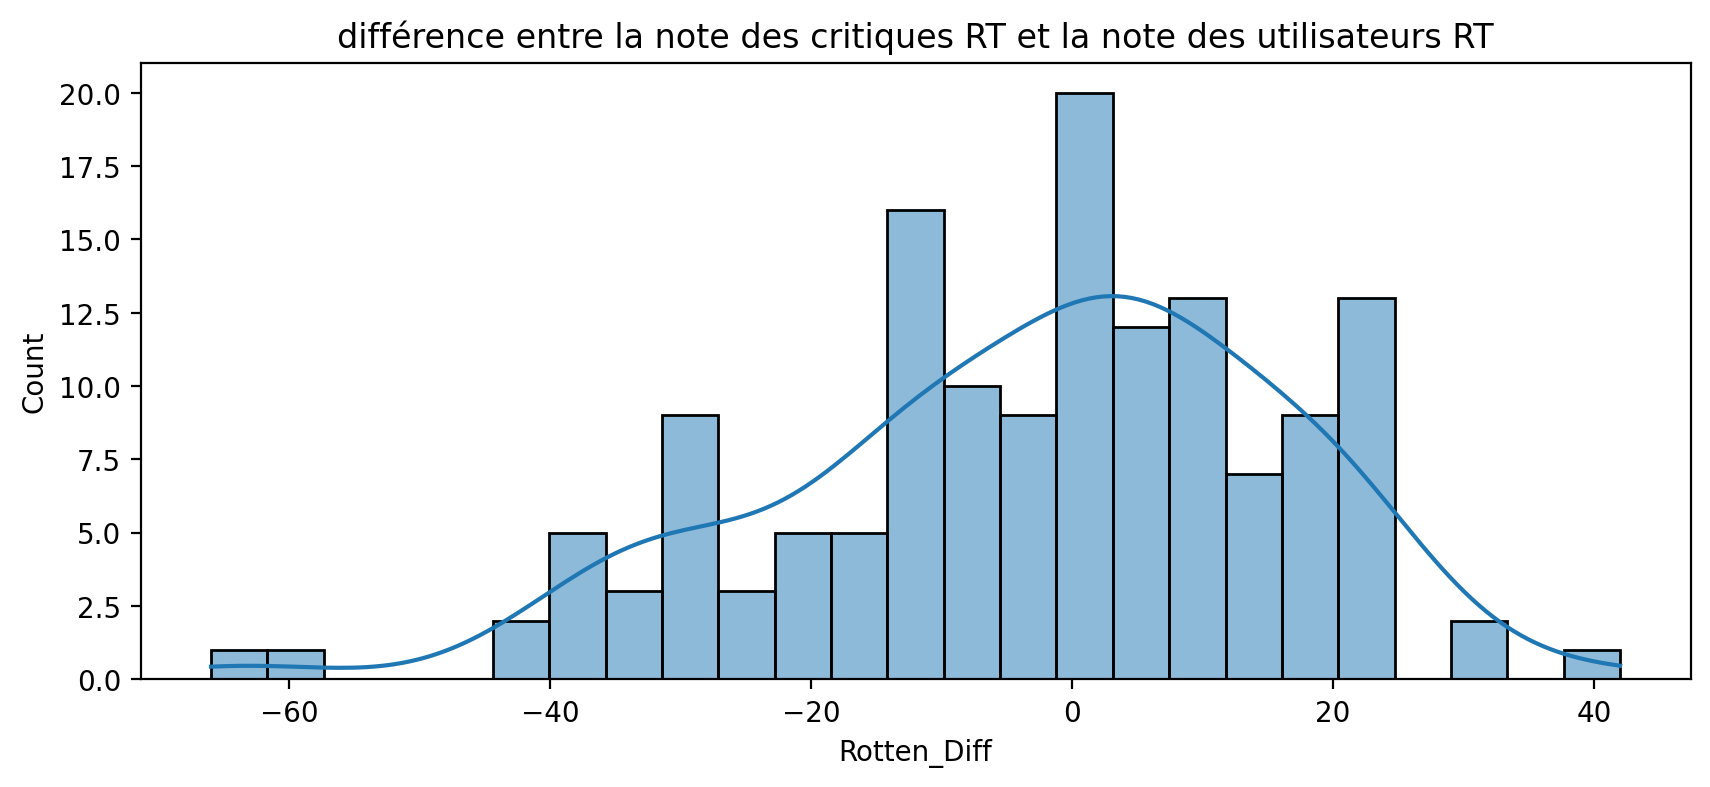

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)
plt.title("différence entre la note des critiques RT et la note des utilisateurs RT")
plt.show()

distribution montrant la valeur absolue de la différence des notes entre les critiques et les utilisateurs sur Rotten Tomatoes

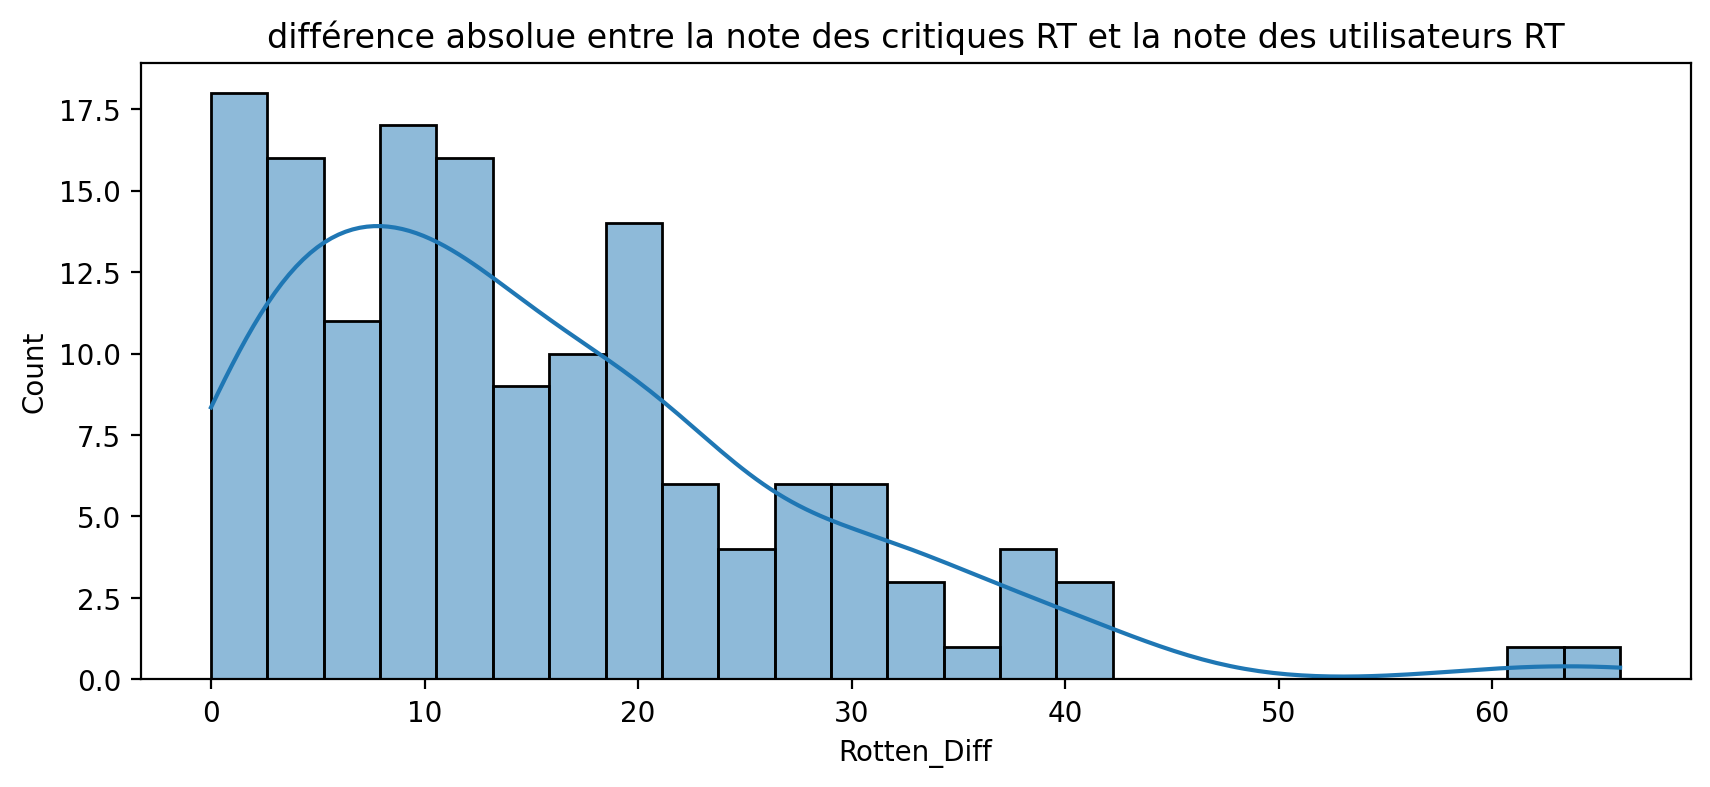

In [31]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),kde=True,bins=25)
plt.title("différence absolue entre la note des critiques RT et la note des utilisateurs RT")
plt.show()

Voyons quels films sont à l'origine des différences les plus importantes

Puisque nous avons calculé la différence en tant que (Notes des Critiques - Notes des Utilisateurs), les grandes valeurs négatives impliquent que les utilisateurs ont évalué le film beaucoup plus haut en moyenne que les critiques.

top 5 des films qui ont obtenu une note moyenne des utilisateurs supérieure à celle des critiques

In [35]:
print("Les utilisateurs adorent mais les critiques détestent")
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Les utilisateurs adorent mais les critiques détestent


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


top 5 des films qui ont obtenu une note moyenne des critiques supérieure à celle des utilisateurs

In [36]:
print("Les critiques adorent, mais les utilisateurs détestent")
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Les critiques adorent, mais les utilisateurs détestent


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


nuage de points de la note MetaCritic par rapport à la note Metacritic des utilisateurs.

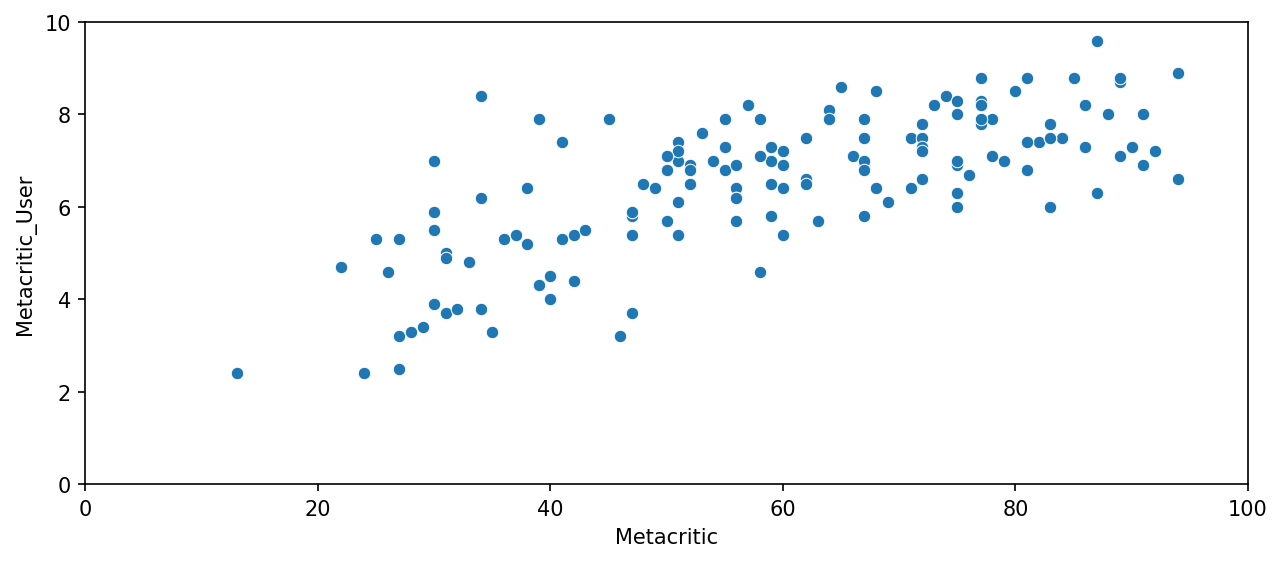

In [38]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)
plt.show()

 nuage de points montrant la relation entre le nombre de votes sur MetaCritic et le nombre de votes sur IMDb

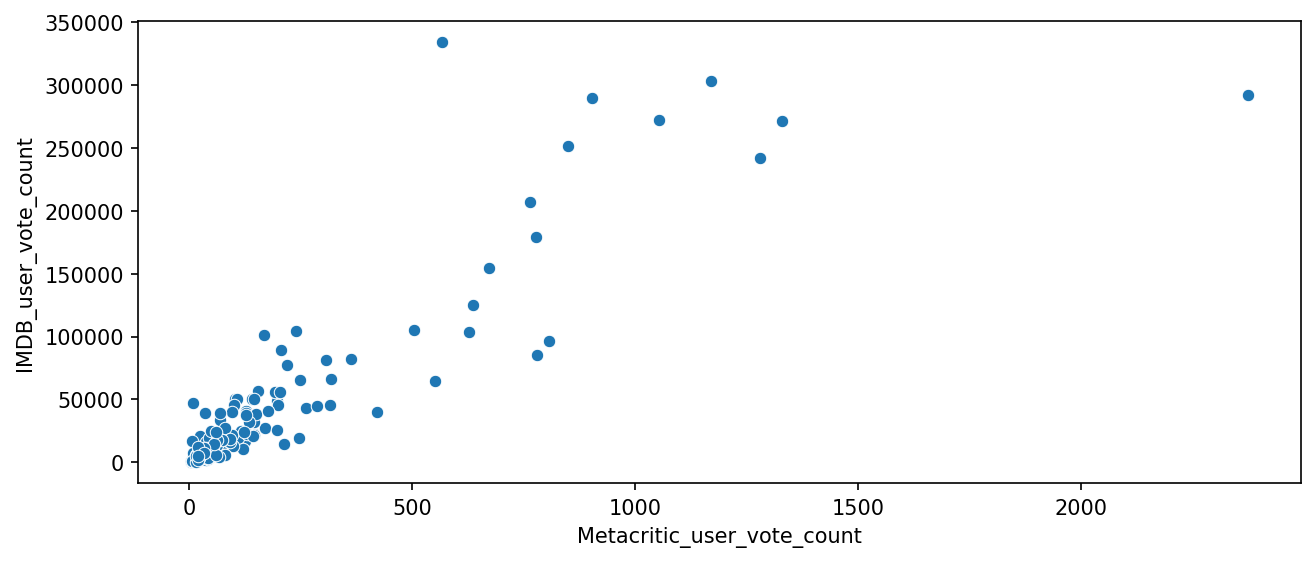

In [40]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')
plt.show()

 film ayant eu le plus grand nombre de votes des utilisateurs IMDd

In [41]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


film ayant le plus grand nombre de votes des utilisateurs MetaCritic

In [42]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


Pour finir, examinons si Fandango affiche artificiellement des notes supérieures aux autres sites de critiques de film pour augmenter les ventes de billets.

Combinons la table Fandango avec la table all_sites

In [43]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [45]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


In [46]:
df.describe()

,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


Normalisation des colonnes comme celles de STARS et RATINGS de Fandango sur l'échelle 0-5

In [47]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

In [48]:
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [49]:
# N'exécutez pas cette cellule plusieurs fois, sinon vous continuez à diviser !
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [50]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


Créons maintenant un DataFrame norm_scores qui ne contient que les notes normalisées. Incluez à la fois STARS et RATING de la table Fandango d'origine

In [51]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [52]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


Création d'un diagramme comparant les distributions des notes normalisées sur tous les sites.

In [57]:
def move_legend(ax, new_loc, **kws):
    handles, labels = ax.get_legend_handles_labels()  # Get handles and labels directly
    if handles:  # Check if legend exists
        ax.legend(handles, labels, loc=new_loc, **kws)

<ipython-input-59-876b8441b2c2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)


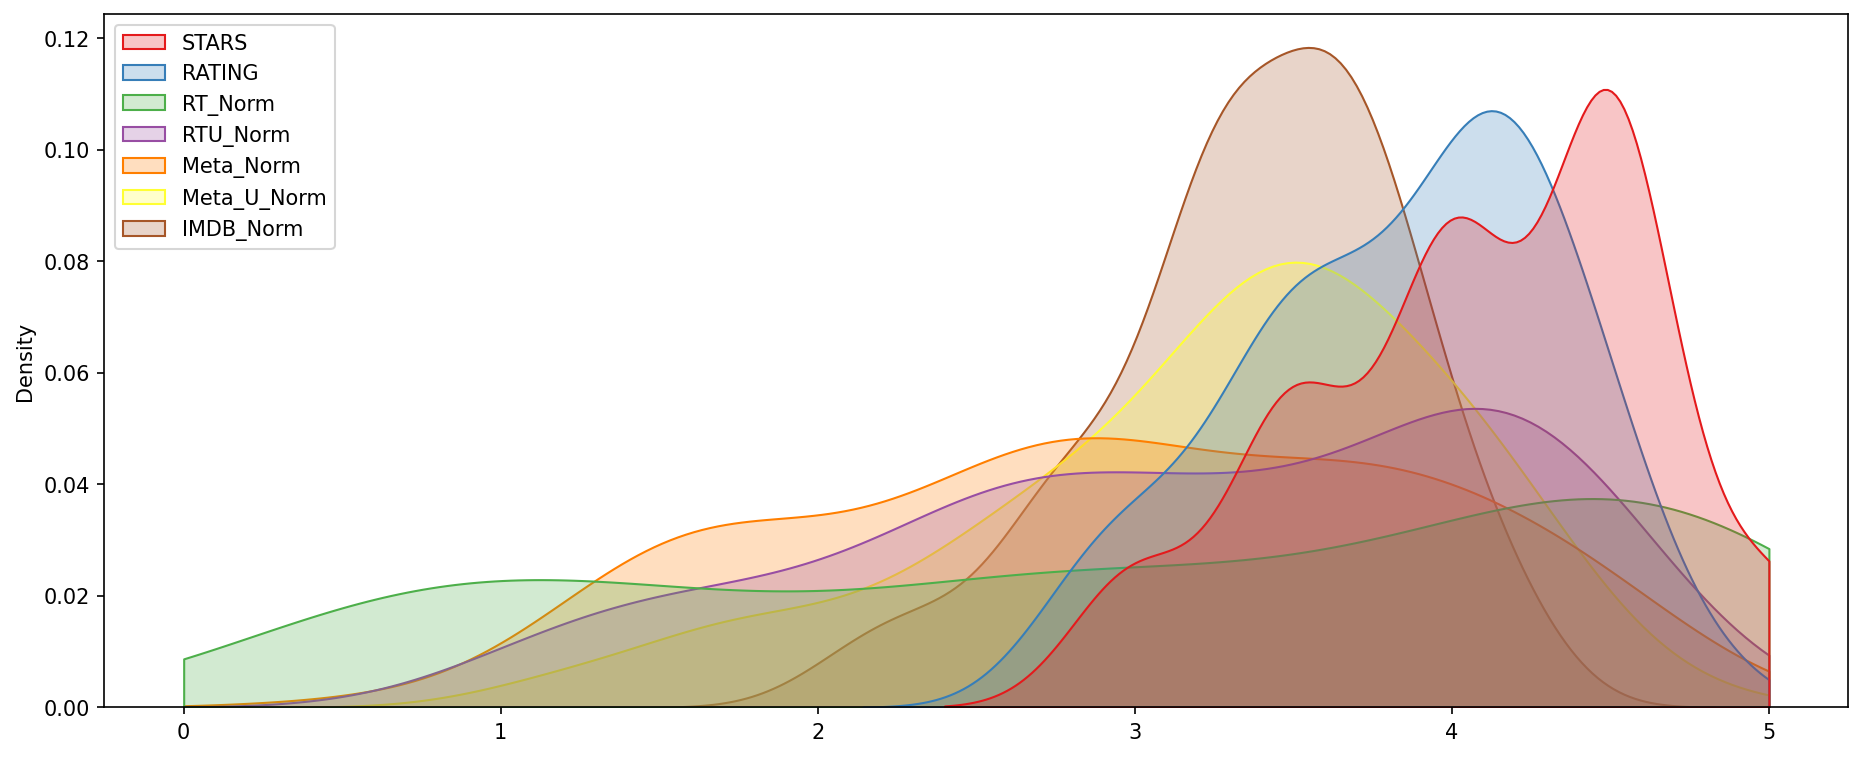

In [59]:
 fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")
plt.show()

Il est clair que la distribution de Fandango est inégale. Nous pouvons également constater que les critiques de RT ont la distribution la plus uniforme

Comparons directement ces deux-là

<ipython-input-61-bb960178640b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)


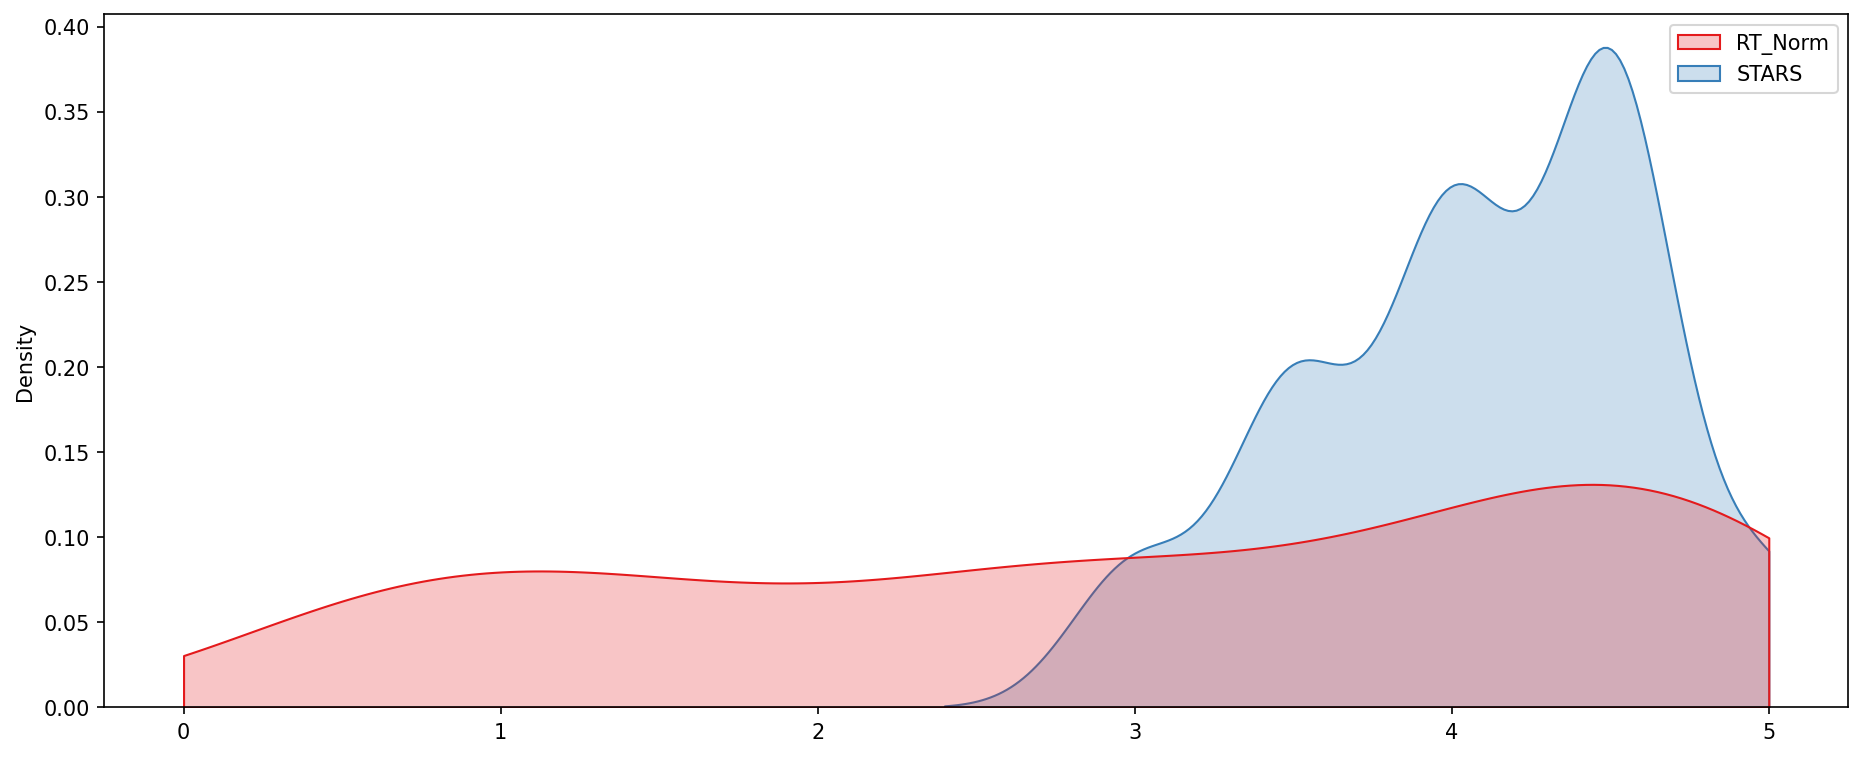

In [61]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")
plt.show()

histogramme comparant toutes les notes normalisées.

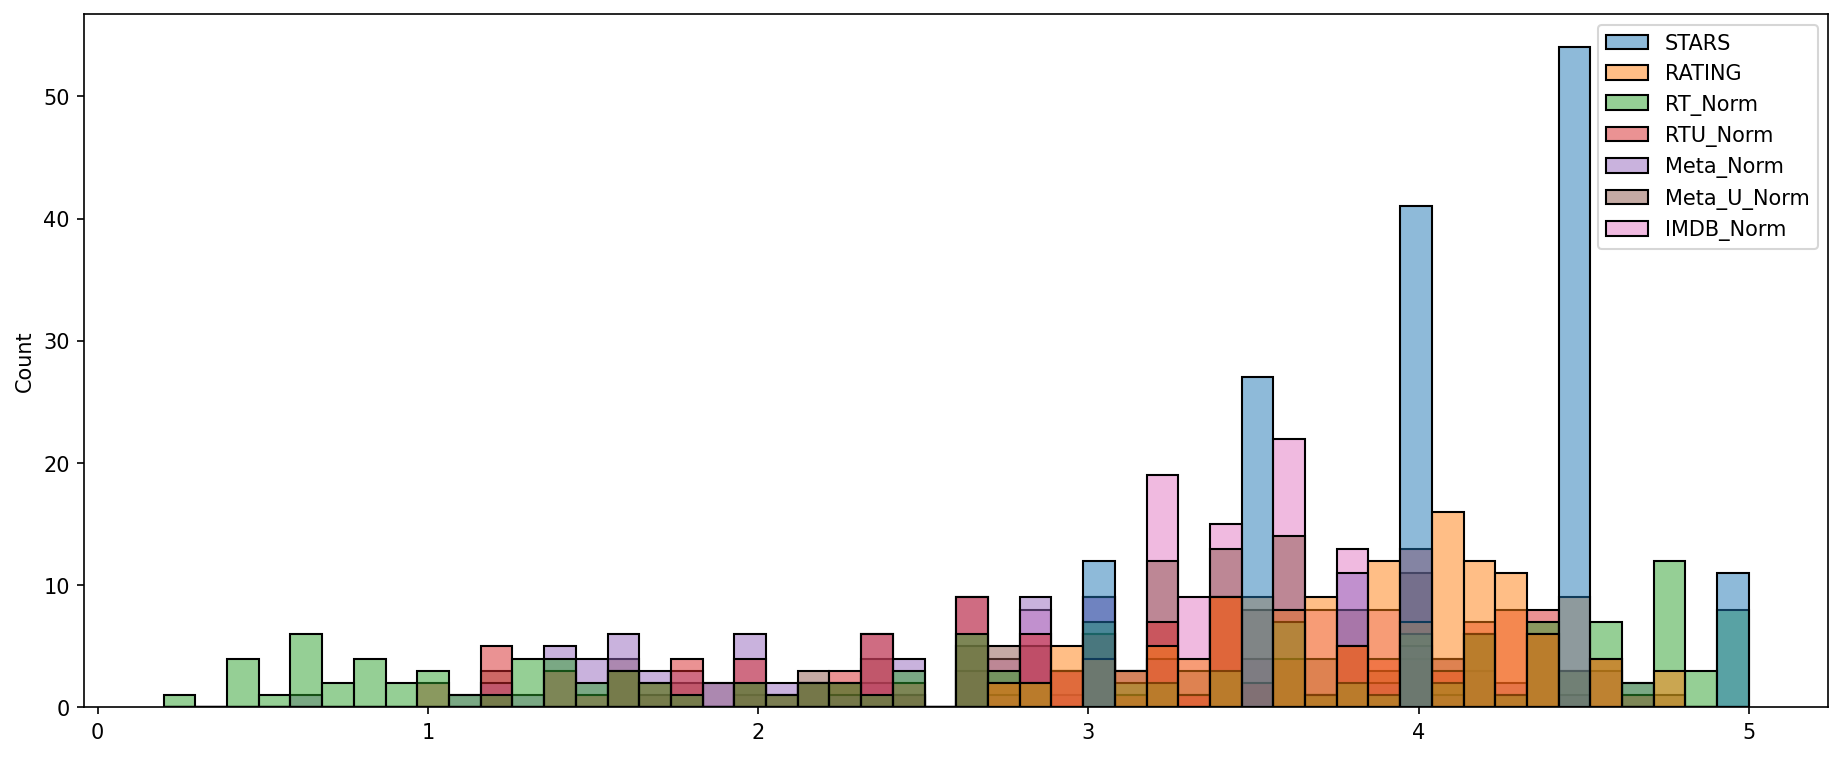

In [62]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm_scores,bins=50);

visualisation de clustermap de toutes les notes normalisées.
Notez les différences de notation, les films les mieux notés doivent être regroupés par rapport aux films mal notés

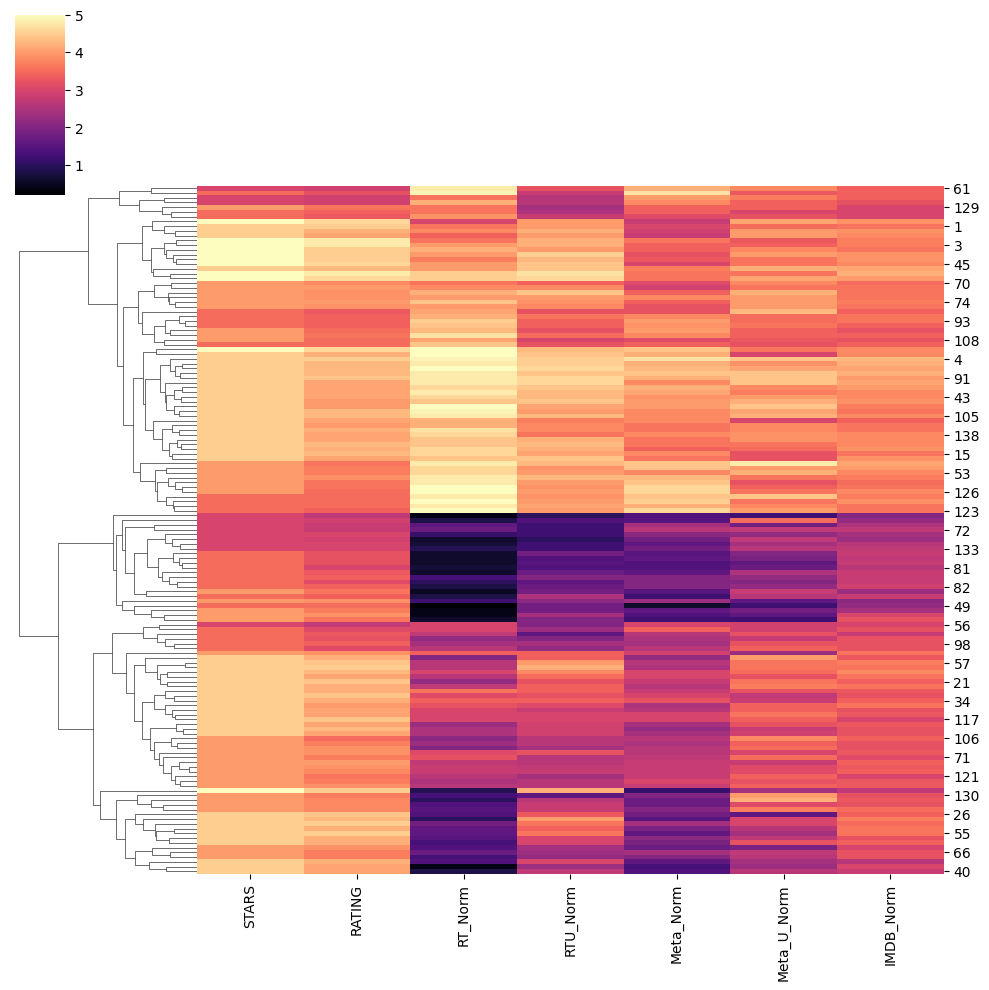

In [64]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)
plt.show()

Il est clair que Fandango note les films de façon beaucoup plus généreuse que les autres plateformes, surtout si l'on considère qu'il affiche alors une version arrondie de sa note

Examinons le top 10 des pires films

In [65]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [66]:
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Visualisation de la distribution des notes sur toutes les plateformes pour les 10 films les plus mal notés par les critiques de RT

<ipython-input-67-dd83bc168690>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')


Text(0.5, 1.0, 'Notes pour les 10 films les plus mal notés par les critiques de RT')

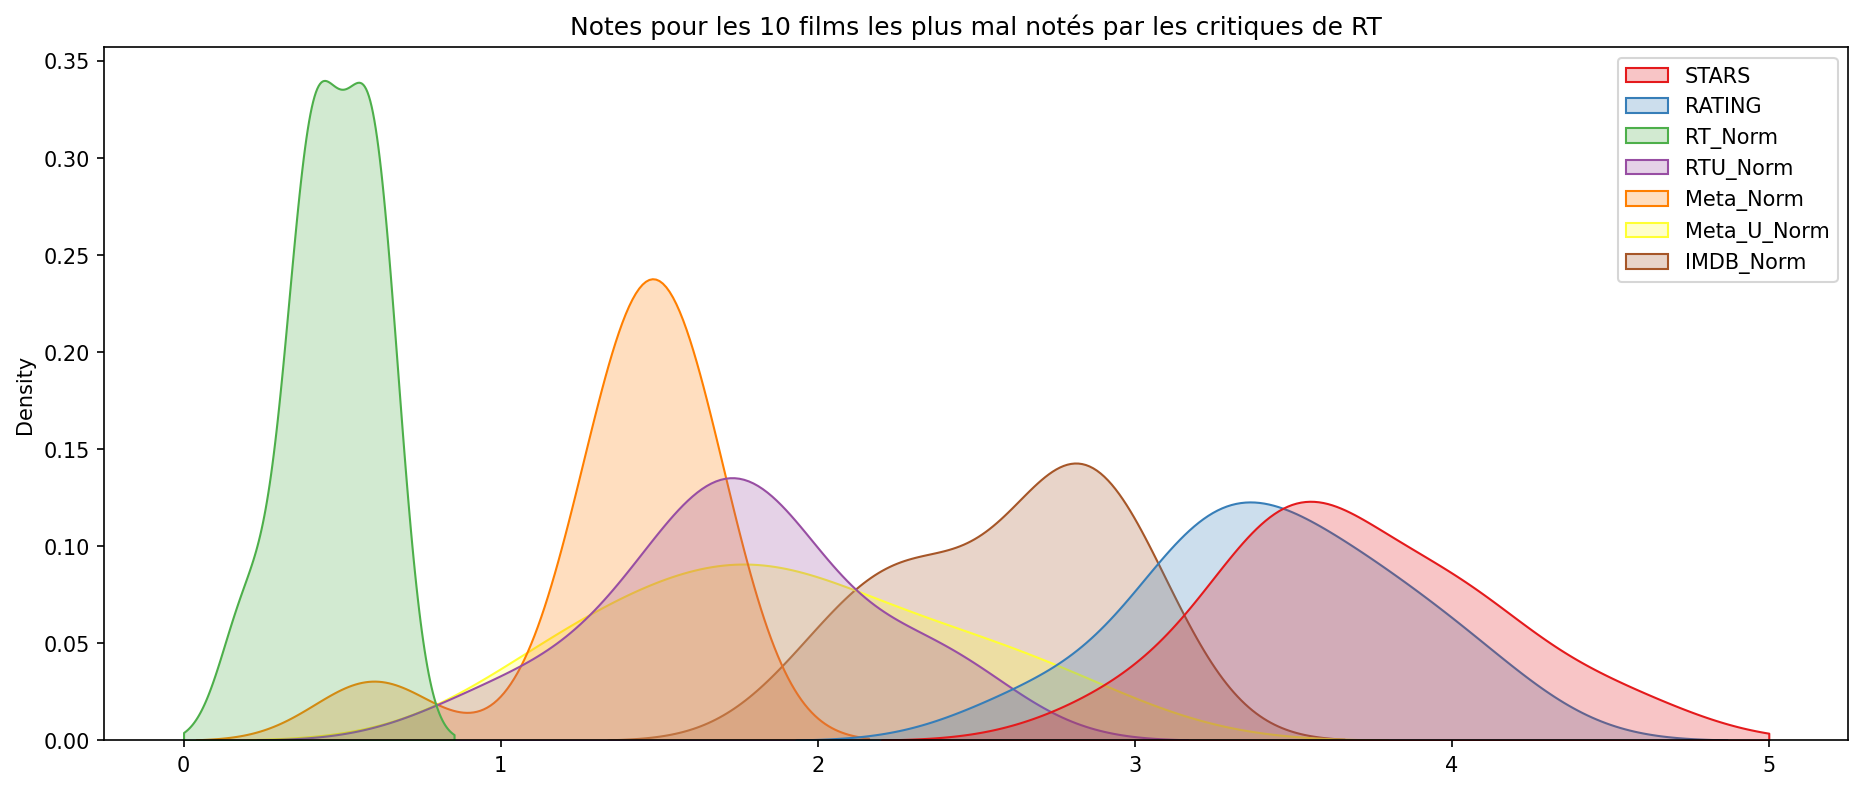

In [67]:
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Notes pour les 10 films les plus mal notés par les critiques de RT")

In [68]:
norm_films.iloc[25]

,25
STARS,4.5
RATING,4.1
RT_Norm,0.4
RTU_Norm,2.3
Meta_Norm,1.3
Meta_U_Norm,2.3
IMDB_Norm,3.0
FILM,Taken 3 (2015)


In [69]:
0.4+2.3+1.3+2.3+3

9.3

In [70]:
9.3/5

1.86

 En conclusion Fandango affiche environ 3 à 4 étoiles pour des films clairement mauvais ! Remarquez le plus grand escroc : Taken 3 !. Fandango affiche 4,5 étoiles sur son site pour un film avec une note moyenne de 1,86 sur les autres plateformes !